In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns

In [2]:
df = pd.read_csv('allTogether.csv')

def myround(x, base=1, dec=1):
    return round(base * round(x/base),dec)

# groupNames, majLabel and colors are synonyms
df = df.drop(['question.groupNames','question.colors'], axis=1)

# rND is labeled in reverse
df['question.new_rND'] = 2 - df['question.new_rND']

# add gender-focused version of the rND score (demographic parity)
# S=1 for male personas, S=0 for female personas
df['question.gender_rND'] = df['question.new_rND']
df.loc[df['question.majLabel']=='female', 'question.gender_rND'] = 2-df['question.new_rND']
# S=0 for female personas, S=1 for male personas
df['question.inverse_gender_rND'] = df['question.new_rND']
df.loc[df['question.majLabel']=='male', 'question.inverse_gender_rND'] = 2-df['question.new_rND']

# categorial gender-based rND
df['question.cat_gender_rND'] = myround(df['question.new_rND'], .2)
df.loc[df['question.majLabel']=='female', 'question.cat_gender_rND'] = myround(2-df['question.new_rND'], .2)
# categorial inversed gender-based rND
df['question.cat_inverse_gender_rND'] = myround(df['question.new_rND'], .2)
df.loc[df['question.majLabel']=='male', 'question.cat_inverse_gender_rND'] = myround(2-df['question.new_rND'], .2)

# categorial majority-based rND
df['question.cat_rND'] = myround(df['question.new_rND'], .2)

# categorial inversed majority-based rND
df['question.cat_inverse_rND'] = myround(2-df['question.new_rND'], .2)

pd.set_option('display.max_columns', None)
df.head()

,_id,rating,inconfidence,secondsElapsed,question.questionType,question.number,question.minSize,question.majSize,question.majLabel,question.tpr,question.tnr,question.bcr,question.accuracy,question.adj_tpr,question.adj_tnr,question.adj_bcr,question.adj_accuracy,question.tpr0,question.tnr0,question.bcr0,question.accuracy0,question.adj_tpr0,question.adj_tnr0,question.adj_bcr0,question.adj_accuracy0,question.tpr1,question.tnr1,question.bcr1,question.accuracy1,question.adj_tpr1,question.adj_tnr1,question.adj_bcr1,question.adj_accuracy1,question.s_tpr,question.s_tnr,question.s_bcr,question.s_accuracy,question.s_adj_tpr,question.s_adj_tnr,question.s_adj_bcr,question.s_adj_accuracy,question.cv,question.cluster,question.ordering_utility,question.sum_of_diff,question.rND,question.new_rND,user._id,user.language,user.accuracy,user.age,user.believe,user.comparativeAccuracy,user.confidence,user.edu,user.fear,user.gender,user.genderParity,user.political,user.religious,user.screenHeight,user.screenWidth,user.will,user.agreeableness,user.conscientiousness,user.extraversion,user.neuroticism,user.openness,question.gender_rND,question.inverse_gender_rND,question.cat_gender_rND,question.cat_inverse_gender_rND,question.cat_rND,question.cat_inverse_rND
0,ObjectId(5f3500c84f6d2fc080cfe347),0.89,0.84,36.534,selection,719,3,7,female,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.00,1.000000,NaN,NaN,1.000000,1.0,1.0,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.714286,3,NaN,NaN,NaN,NaN,ObjectId(5f350096c9eafb2f751e4c21),de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,ObjectId(5f3500d94f6d2fc080cfe34d),0.58,NaN,16.849,selection,944,5,5,female,0.833333,0.750000,0.791667,0.8,0.927083,0.833333,0.880208,0.898551,0.666667,1.000000,0.833333,0.80,0.854167,1.000000,0.927083,0.898551,1.0,0.5,0.75,0.800000,1.000000,0.666667,0.833333,0.898551,0.666667,1.500000,1.083333,1.000000,0.854167,1.333333,1.093750,1.000000,0.600000,8,NaN,NaN,NaN,NaN,ObjectId(5f350096c9eafb2f751e4c21),de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,ObjectId(5f3500e64f6d2fc080cfe351),0.39,0.06,12.849,selection,282,4,6,male,0.666667,0.857143,0.761905,0.8,0.774194,0.885246,0.829720,0.862745,1.000000,0.666667,0.833333,0.75,1.000000,0.791045,0.895522,0.827160,0.5,1.0,0.75,0.833333,0.730769,1.000000,0.865385,0.921348,1.500000,0.666667,1.083333,0.916667,1.269231,0.791045,1.030138,0.905812,1.333333,7,NaN,NaN,NaN,NaN,ObjectId(5f350096c9eafb2f751e4c21),de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3,ObjectId(5f3500f14f6d2fc080cfe355),0.25,NaN,10.424,selection,556,4,6,female,0.500000,0.666667,0.583333,0.6,0.565217,0.813725,0.689471,0.736486,0.333333,1.000000,0.666667,0.50,0.395349,1.000000,0.697674,0.500000,1.0,0.6,0.80,0.666667,1.000000,0.747967,0.873984,0.770370,0.333333,1.400000,0.866667,0.833333,0.395349,1.252033,0.823691,0.729630,0.750000,2,NaN,NaN,NaN,NaN,ObjectId(5f350096c9eafb2f751e4c21),de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,ObjectId(5f3500f94f6d2fc080cfe359),0.05,0.13,8.199,selection,52,1,9,female,0.000000,0.888889,0.444444,0.8,0.000000,0.857143,0.428571,0.825911,NaN,0.000000,NaN,0.00,NaN,0.000000,NaN,0.000000,0.0,1.0,0.50,0.888889,0.000000,1.000000,0.500000,0.957746,NaN,0.000000,NaN,0.111111,NaN,0.000000,NaN,0.042254,2.000000,0,NaN,NaN,NaN,NaN,ObjectId(5f350096c9eafb2f751e4c21),de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cat_cols = [
    'question.majLabel',
    'question.questionType',
    'user.language',
    'user.age',
    'user.edu',
    'user.gender',
    'question.cluster',
]
num_cols = [
    'secondsElapsed',
    'question.minSize',
    'question.majSize',
    'user.believe',
    'user.confidence',
    'user.fear',
    'user.political',
    'user.religious',
    'user.screenHeight',
    'user.screenWidth',
    'user.will',
    'user.agreeableness',
    'user.conscientiousness',
    'user.extraversion',
    'user.neuroticism',
    'user.openness',
    'user.accuracy',
    'user.comparativeAccuracy',
    'user.genderParity',
    'inconfidence',
]
num_cols_ran = [
    'question.ordering_utility',
    'question.sum_of_diff',
    'question.rND',
    'question.cat_gender_rND',
    'question.cat_rND',
    'question.cat_inverse_gender_rND',
    'question.cat_inverse_rND',
]

# split dataset according to questionType
df_ran = df.query("`question.questionType` == 'ranking'")[['rating'] + num_cols + num_cols_ran + cat_cols]
df_ran[:10]

,rating,secondsElapsed,question.minSize,question.majSize,user.believe,user.confidence,user.fear,user.political,user.religious,user.screenHeight,user.screenWidth,user.will,user.agreeableness,user.conscientiousness,user.extraversion,user.neuroticism,user.openness,user.accuracy,user.comparativeAccuracy,user.genderParity,inconfidence,question.ordering_utility,question.sum_of_diff,question.rND,question.cat_gender_rND,question.cat_rND,question.cat_inverse_gender_rND,question.cat_inverse_rND,question.majLabel,question.questionType,user.language,user.age,user.edu,user.gender,question.cluster
10,0.36,30.358,4,6,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,NaN,0.555556,0.622642,0.524177,0.6,0.6,1.4,1.4,male,ranking,de,25,abitur,male,14
11,0.59,12.189,4,6,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,NaN,0.594595,0.790000,0.444673,0.6,0.6,1.4,1.4,male,ranking,de,25,abitur,male,16
12,0.45,8.107,2,8,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,0.01,0.255814,0.494949,0.171153,1.0,1.0,1.0,1.0,male,ranking,de,25,abitur,male,17
13,0.61,11.920,5,5,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,0.06,0.717391,0.840336,0.272121,1.4,0.6,0.6,1.4,female,ranking,de,25,abitur,male,12
14,0.49,9.950,5,5,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,NaN,0.617647,0.718750,0.374144,1.0,1.0,1.0,1.0,male,ranking,de,25,abitur,male,18
15,0.13,9.388,5,5,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,NaN,0.368421,0.480000,0.422271,0.8,1.2,1.2,0.8,female,ranking,de,25,abitur,male,11
16,0.77,11.406,5,5,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,0.04,0.794118,0.854167,0.557495,0.6,0.6,1.4,1.4,male,ranking,de,25,abitur,male,19
17,0.21,6.126,3,7,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,0.14,0.275000,0.628571,0.502136,0.6,0.6,1.4,1.4,male,ranking,de,25,abitur,male,15
18,0.18,4.014,4,6,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,NaN,0.000000,0.151261,0.000000,0.2,1.8,1.8,0.2,female,ranking,de,25,abitur,male,13
19,0.54,13.122,5,5,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,0.25,0.772727,0.849057,0.431568,1.2,0.8,0.8,1.2,female,ranking,de,25,abitur,male,10


# Gender Parity

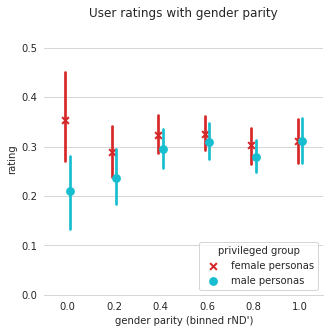

In [4]:
sns.set_style("whitegrid")

df_male = df_ran.copy()
df_male['rND'] = df['question.cat_gender_rND']
df_male['priviledged group'] = 'male personas'
df_female = df_ran.copy()
df_female['rND'] = df['question.cat_inverse_gender_rND']
df_female['priviledged group'] = 'female personas'

cyan = sns.color_palette()[9]
red = sns.color_palette()[3]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, hue='priviledged group', dodge=.1, ci=90,
                  x='rND', y='rating', join=False, palette=[red, cyan], markers=['x','o'],
                  hue_order=['female personas', 'male personas'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.55))
ax.legend(loc=4, title='privileged group')
g.set_title('User ratings with gender parity')
g.set(xlabel = 'gender parity (binned rND\')')
sns.despine(left=True)

**t-test over binned rND'-values**

In [5]:
df_results = pd.DataFrame(columns=['rND','T','p-val'])
for i in [0, 0.2, 0.4, 0.6, 0.8, 1]:
    results = pg.ttest(df_male[df_male.rND == i].rating, df_female[df_female.rND == i].rating)
    new_row = {'rND': i, 'T': results['T']['T-test'], 'p-val': results['p-val']['T-test']}
    df_results = df_results.append(new_row, ignore_index=True)
df_results.set_index('rND')

,T,p-val
rND,,
0.0,-1.904615,0.069988
0.2,-1.156956,0.249291
0.4,-0.808307,0.419484
0.6,-0.485665,0.627465
0.8,-0.741301,0.459081
1.0,0.000000,1.000000


People prefer rankings in which female personas are priviledged over ranking in which male personas are priviledged (same as in selections), but only significantly at 0.0.

### User ratings with gender parity by participant gender

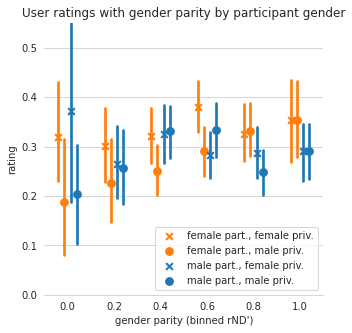

In [6]:
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

df_male = df_ran.query("`user.gender` != 'other'").copy()
df_male['rND'] = df['question.cat_gender_rND']
df_male['type'] = 'male part., male priv.'
df_male.loc[df['user.gender']=='female', 'type'] = 'female part., male priv.'
df_female = df_ran.query("`user.gender` != 'other'").copy()
df_female['rND'] = df['question.cat_inverse_gender_rND']
df_female['type'] = 'male part., female priv.'
df_female.loc[df['user.gender']=='female', 'type'] = 'female part., female priv.'

blue = sns.color_palette()[0]
orange = sns.color_palette()[1]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.4, ci=90,
                  x='rND', y='rating', hue='type', join=False,
                  palette=[orange, orange, blue, blue], markers=['x','o','x','o'],
                  hue_order = ['female part., female priv.', 'female part., male priv.',
                          'male part., female priv.', 'male part., male priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.55))
ax.legend(loc=4)
g.set_title('User ratings with gender parity by participant gender')
g.set(xlabel = 'gender parity (binned rND\')')
sns.despine(left=True)

#### t-test over binned rND'-values by participant gender

In [7]:
df_results = pd.DataFrame(columns=['rND','group 1','T 1','p-val 1','group 2','T 2','p-val 2'])
for i in [0, 0.2, 0.4, 0.6, 0.8, 1]:
    results1 = pg.ttest(df_male[(df_male.rND == i) & (df_male.type == 'female part., male priv.')].rating,
                        df_female[(df_female.rND == i) & (df_female.type == 'female part., female priv.')].rating)
    results2 = pg.ttest(df_male[(df_male.rND == i) & (df_male.type == 'male part., male priv.')].rating,
                        df_female[(df_female.rND == i) & (df_female.type == 'male part., female priv.')].rating)
    new_row = {'rND': i,
               'group 1': 'female part.',
               'T 1': results1['T']['T-test'],
               'p-val 1': results1['p-val']['T-test'],
               'group 2': 'male part.',
               'T 2': results2['T']['T-test'],
               'p-val 2': results2['p-val']['T-test'],
              }
    df_results = df_results.append(new_row, ignore_index=True)
df_results.set_index('rND')

,group 1,T 1,p-val 1,group 2,T 2,p-val 2
rND,,,,,,
0.0,female part.,-1.194424,0.266384,male part.,-1.222401,0.266295
0.2,female part.,-1.089051,0.280804,male part.,-0.142686,0.886926
0.4,female part.,-1.514290,0.132029,male part.,0.137683,0.890660
0.6,female part.,-2.089104,0.038083,male part.,1.151880,0.250679
0.8,female part.,0.121114,0.903782,male part.,-0.893094,0.373194
1.0,female part.,0.000000,1.000000,male part.,0.000000,1.000000


Women prefer unfair rankings in which proportionally more women get ranked higher more so than men do (see also heatmaps & selections)

# Majority-minority group parity

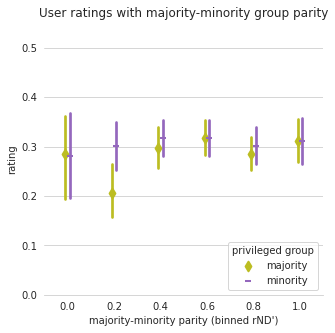

In [8]:
df_maj = df_ran.copy()
df_maj['rND'] = df['question.cat_rND']
df_maj['priviledged group'] = 'majority'
df_min = df_ran.copy()
df_min['rND'] = df['question.cat_inverse_rND']
df_min['priviledged group'] = 'minority'

yellow = sns.color_palette()[8]
purple = sns.color_palette()[4]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_maj, df_min]), ax=ax, hue='priviledged group', dodge=.1, ci=90,
                  x='rND', y='rating', join=False, palette=[yellow, purple], markers=['d','_'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.55))
ax.legend(loc=4, title='privileged group')
g.set_title('User ratings with majority-minority group parity')
g.set(xlabel = 'majority-minority parity (binned rND\')')
sns.despine(left=True)

In [9]:
df_results = pd.DataFrame(columns=['rND','T','p-val'])
for i in [0, 0.2, 0.4, 0.6, 0.8, 1]:
    results_ttest = pg.ttest(df_maj[df_maj.rND == i].rating, df_min[df_min.rND == i].rating)
    new_row = {'rND': i, 'T': results_ttest['T']['T-test'], 'p-val': results_ttest['p-val']['T-test']}
    df_results = df_results.append(new_row, ignore_index=True)
df_results.set_index('rND')

,T,p-val
rND,,
0.0,0.055933,0.955996
0.2,-2.082681,0.039384
0.4,-0.557897,0.577305
0.6,0.038235,0.969520
0.8,-0.545784,0.585666
1.0,0.000000,1.000000


People prefer unfair rankings in which proportionally more of the minority get ranked higher over unfair rankings that benefit the majority  
(significant at rND' = 0.2)

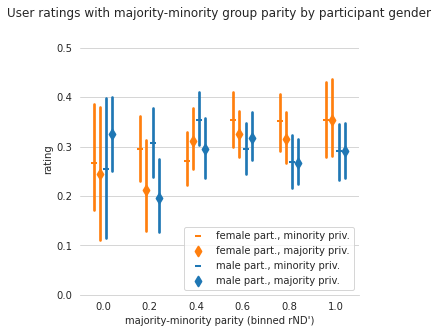

In [10]:
df_maj = df_ran.query("`user.gender` != 'other'").copy()
df_maj['rND'] = df['question.cat_rND']
df_maj['type'] = 'male part., majority priv.'
df_maj.loc[df['user.gender']=='female', 'type'] = 'female part., majority priv.'
df_min = df_ran.query("`user.gender` != 'other'").copy()
df_min['rND'] = df['question.cat_inverse_rND']
df_min['type'] = 'male part., minority priv.'
df_min.loc[df['user.gender']=='female', 'type'] = 'female part., minority priv.'

blue = sns.color_palette()[0]
orange = sns.color_palette()[1]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_maj, df_min]), ax=ax, dodge=.4, ci=90,
                  x='rND', y='rating', hue='type', join=False,
                  palette=[orange, orange, blue, blue], markers=['_','d','_','d'],
                  hue_order = ['female part., minority priv.', 'female part., majority priv.',
                          'male part., minority priv.', 'male part., majority priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.55))
ax.legend(loc=4)
g.set_title('User ratings with majority-minority group parity by participant gender')
g.set(xlabel = 'majority-minority parity (binned rND\')')
sns.despine(left=True)

Women don't seem to prefer unfair rankings in which proportionally more of the minority get selected more so than men do (in contrast to the selections)

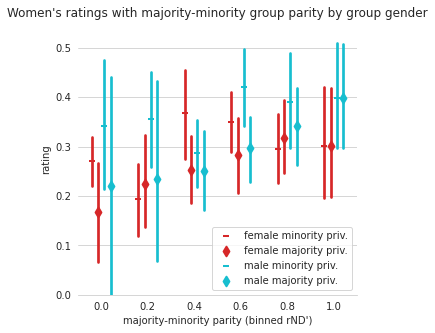

In [11]:
df_maj = df_ran.query("`user.gender` == 'female'").copy()
df_maj['rND'] = df['question.cat_gender_rND']
df_maj['type'] = 'male majority priv.'
df_maj.loc[df['question.majLabel']=='female', 'type'] = 'female majority priv.'
df_min = df_ran.query("`user.gender` == 'female'").copy()
df_min['rND'] = df['question.cat_inverse_gender_rND']
df_min['type'] = 'male minority priv.'
df_min.loc[df['question.majLabel']=='female', 'type'] = 'female minority priv.'

cyan = sns.color_palette()[9]
red = sns.color_palette()[3]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_maj, df_min]), ax=ax, dodge=.4, ci=90,
                  x='rND', y='rating', hue='type', join=False,
                  palette=[red, red, cyan, cyan], markers=['_','d','_','d'],
                  hue_order = ['female minority priv.', 'female majority priv.',
                               'male minority priv.', 'male majority priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.55))
ax.legend(loc=4)
g.set_title('Women\'s ratings with majority-minority group parity by group gender')
g.set(xlabel = 'majority-minority parity (binned rND\')')
sns.despine(left=True)

Compare (because the appear together):  
female minority - male majority  
male minority - female majority

Women mostly prefer the minority, even if it is a male minority. (see selections)

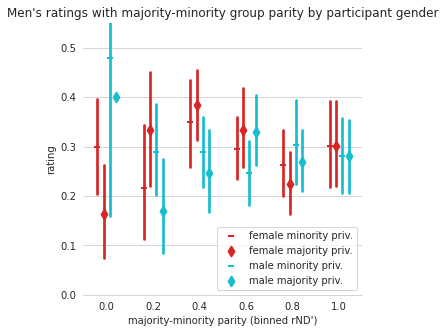

In [12]:
df_maj = df_ran.query("`user.gender` == 'male'").copy()
df_maj['rND'] = df['question.cat_gender_rND']
df_maj['type'] = 'male majority priv.'
df_maj.loc[df['question.majLabel']=='female', 'type'] = 'female majority priv.'
df_min = df_ran.query("`user.gender` == 'male'").copy()
df_min['rND'] = df['question.cat_inverse_gender_rND']
df_min['type'] = 'male minority priv.'
df_min.loc[df['question.majLabel']=='female', 'type'] = 'female minority priv.'

cyan = sns.color_palette()[9]
red = sns.color_palette()[3]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_maj, df_min]), ax=ax, dodge=.4, ci=90,
                  x='rND', y='rating', hue='type', join=False,
                  palette=[red, red, cyan, cyan], markers=['_','d','_','d'],
                  hue_order = ['female minority priv.', 'female majority priv.',
                               'male minority priv.', 'male majority priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.55))
ax.legend(loc=4)
g.set_title('Men\'s ratings with majority-minority group parity by participant gender')
g.set(xlabel = 'majority-minority parity (binned rND\')')
sns.despine(left=True)

Compare (because the appear together):  
female minority - male majority  
male minority - female majority

Men prefer priviledging a female majority over a female minority, but a male minority over a male majority. (unlike in selections)

# Group Parity defined by Group Size or Gender

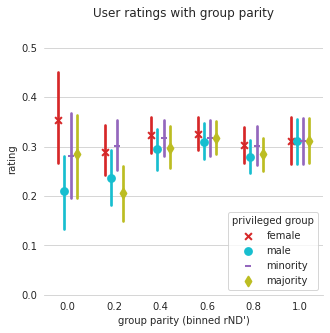

In [13]:
df_rND = df_ran.copy()
df_rND['rND'] = df['question.cat_rND']
df_rND['type'] = 'majority'
df_gender_rND = df_ran.copy()
df_gender_rND['rND'] = df['question.cat_gender_rND']
df_gender_rND['type'] = 'male'
df_inv_rND = df_ran.copy()
df_inv_rND['rND'] = df['question.cat_inverse_rND']
df_inv_rND['type'] = 'minority'
df_inv_gender_rND = df_ran.copy()
df_inv_gender_rND['rND'] = df['question.cat_inverse_gender_rND']
df_inv_gender_rND['type'] = 'female'

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_rND, df_gender_rND, df_inv_rND, df_inv_gender_rND]), ax=ax, color='tomato', dodge=.4,
                  x='rND', y='rating', hue='type', ci=90, join=False,
                  markers=['x','o','_','d'], palette=[red, cyan, purple, yellow],
                  hue_order=['female','male','minority','majority'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,.55))
ax.legend(loc=4, title='privileged group')
g.set_title('User ratings with group parity')
g.set(xlabel = 'group parity (binned rND\')')
sns.despine(left=True)

In [14]:
df_results = pd.DataFrame(columns=['rND','group 1','T 1','p-val 1','group 2','T 2','p-val 2'])
for i in [0, 0.2, 0.4, 0.6, 0.8, 1]:
    results1 = pg.ttest(df_gender_rND[df_gender_rND.rND == i].rating,
                        df_inv_gender_rND[df_inv_gender_rND.rND == i].rating)
    results2 = pg.ttest(df_rND[df_rND.rND == i].rating,
                        df_inv_rND[df_inv_rND.rND == i].rating)
    new_row = {'rND': i,
               'group 1': 'gender parity',
               'T 1': results1['T']['T-test'],
               'p-val 1': results1['p-val']['T-test'],
               'group 2': 'min-maj parity',
               'T 2': results2['T']['T-test'],
               'p-val 2': results2['p-val']['T-test'],
              }
    df_results = df_results.append(new_row, ignore_index=True)
df_results.set_index('rND')

,group 1,T 1,p-val 1,group 2,T 2,p-val 2
rND,,,,,,
0.0,gender parity,-1.904615,0.069988,min-maj parity,0.055933,0.955996
0.2,gender parity,-1.156956,0.249291,min-maj parity,-2.082681,0.039384
0.4,gender parity,-0.808307,0.419484,min-maj parity,-0.557897,0.577305
0.6,gender parity,-0.485665,0.627465,min-maj parity,0.038235,0.969520
0.8,gender parity,-0.741301,0.459081,min-maj parity,-0.545784,0.585666
1.0,gender parity,0.000000,1.000000,min-maj parity,0.000000,1.000000


The difference between female priv. and male priv. is not generally bigger than minority priv. and majority priv. - gender and group size are of similar interest. (unlike in selections)

# Group Parity by Age

splited groups at: 25.0


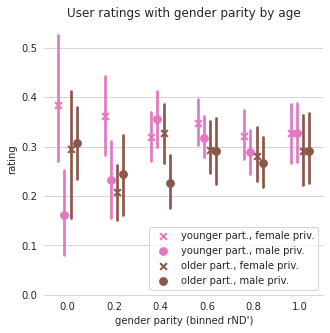

In [15]:
split_at = np.nanmedian(df_ran['user.age'])
print('splited groups at:', split_at)

df_male = df_ran.copy()
df_male['rND'] = df['question.cat_gender_rND']
df_male['type'] = 'younger part., male priv.'
df_male.loc[df['user.age']>split_at, 'type'] = 'older part., male priv.'
df_female = df_ran.copy()
df_female['rND'] = df['question.cat_inverse_gender_rND']
df_female['type'] = 'younger part., female priv.'
df_female.loc[df['user.age']>split_at, 'type'] = 'older part., female priv.'

brown = sns.color_palette()[5]
pink = sns.color_palette()[6]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.4, ci=90,
                  x='rND', y='rating', hue='type', join=False,
                  palette=[pink, pink, brown, brown], markers=['x','o','x','o'],
                  hue_order = ['younger part., female priv.', 'younger part., male priv.',
                          'older part., female priv.', 'older part., male priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.55))
ax.legend(loc=4)
g.set_title('User ratings with gender parity by age')
g.set(xlabel = 'gender parity (binned rND\')')
sns.despine(left=True)

Younger participants prefer scenarios in which more women get selected more so than older participants do (stronger than in selections)

splited groups at: 25.0


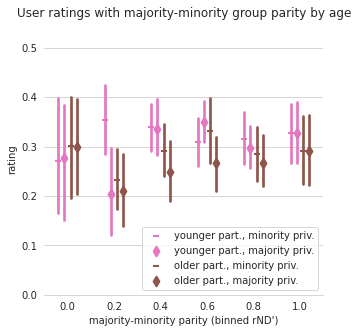

In [16]:
split_at = np.nanmedian(df_ran['user.age'])
print('splited groups at:', split_at)

df_male = df_ran.copy()
df_male['rND'] = df['question.cat_rND']
df_male['type'] = 'younger part., majority priv.'
df_male.loc[df['user.age']>split_at, 'type'] = 'older part., majority priv.'
df_female = df_ran.copy()
df_female['rND'] = df['question.cat_inverse_rND']
df_female['type'] = 'younger part., minority priv.'
df_female.loc[df['user.age']>split_at, 'type'] = 'older part., minority priv.'

brown = sns.color_palette()[5]
pink = sns.color_palette()[6]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.4, ci=90,
                  x='rND', y='rating', hue='type', join=False,
                  palette=[pink, pink, brown, brown], markers=['_','d','_','d'],
                  hue_order = ['younger part., minority priv.', 'younger part., majority priv.',
                          'older part., minority priv.', 'older part., majority priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.55))
ax.legend(loc=4)
g.set_title('User ratings with majority-minority group parity by age')
g.set(xlabel = 'majority-minority parity (binned rND\')')
sns.despine(left=True)

Younger participants prefer scenarios at rND'=0.2 in which more personas of the minority gets selected more so than older participants do.

# Group Parity by Religiousness

splited groups at: 0.08


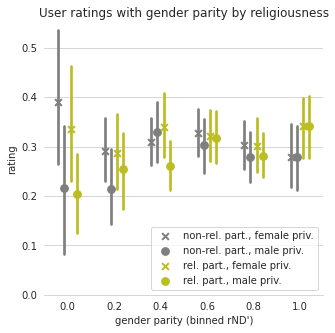

In [17]:
split_at = np.nanmedian(df_ran['user.religious'])
print('splited groups at:', split_at)

df_male = df_ran.copy()
df_male['rND'] = df['question.cat_gender_rND']
df_male['type'] = 'non-rel. part., male priv.'
df_male.loc[df['user.religious']>split_at, 'type'] = 'rel. part., male priv.'
df_female = df_ran.copy()
df_female['rND'] = df['question.cat_inverse_gender_rND']
df_female['type'] = 'non-rel. part., female priv.'
df_female.loc[df['user.religious']>split_at, 'type'] = 'rel. part., female priv.'

gray = sns.color_palette()[7]
yellow = sns.color_palette()[8]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.4, ci=90,
                  x='rND', y='rating', hue='type', join=False,
                  palette=[gray, gray, yellow, yellow], markers=['x','o','x','o'],
                  hue_order = ['non-rel. part., female priv.', 'non-rel. part., male priv.',
                          'rel. part., female priv.', 'rel. part., male priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.55))
ax.legend(loc=4)
g.set_title('User ratings with gender parity by religiousness')
g.set(xlabel = 'gender parity (binned rND\')')
sns.despine(left=True)

No clear effect (compared to selections) visible.

splited groups at: 0.08


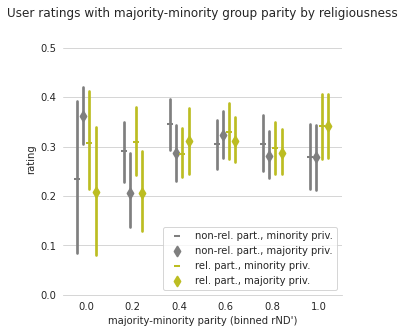

In [18]:
split_at = np.nanmedian(df_ran['user.religious'])
print('splited groups at:', split_at)

df_maj = df_ran.copy()
df_maj['rND'] = df['question.cat_rND']
df_maj['type'] = 'non-rel. part., majority priv.'
df_maj.loc[df['user.religious']>split_at, 'type'] = 'rel. part., majority priv.'
df_min = df_ran.copy()
df_min['rND'] = df['question.cat_inverse_rND']
df_min['type'] = 'non-rel. part., minority priv.'
df_min.loc[df['user.religious']>split_at, 'type'] = 'rel. part., minority priv.'

gray = sns.color_palette()[7]
yellow = sns.color_palette()[8]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_maj, df_min]), ax=ax, dodge=.4, ci=90,
                  x='rND', y='rating', hue='type', join=False,
                  palette=[gray, gray, yellow, yellow], markers=['_','d','_','d'],
                  hue_order = ['non-rel. part., minority priv.', 'non-rel. part., majority priv.',
                          'rel. part., minority priv.', 'rel. part., majority priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.55))
ax.legend(loc=4)
g.set_title('User ratings with majority-minority group parity by religiousness')
g.set(xlabel = 'majority-minority parity (binned rND\')')
sns.despine(left=True)

People of any religiousness rate rankings in which the majority / the minority are priviledged similarly. (same as in selections)

# Group Parity by Political Orientation

splited groups at: 0.8


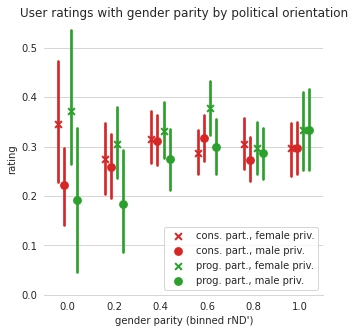

In [19]:
split_at = np.nanmedian(df_ran['user.political'])
print('splited groups at:', split_at)

df_male = df_ran.copy()
df_male['rND'] = df['question.cat_gender_rND']
df_male['type'] = 'cons. part., male priv.'
df_male.loc[df['user.political']>split_at, 'type'] = 'prog. part., male priv.'
df_female = df_ran.copy()
df_female['rND'] = df['question.cat_inverse_gender_rND']
df_female['type'] = 'cons. part., female priv.'
df_female.loc[df['user.political']>split_at, 'type'] = 'prog. part., female priv.'

red = sns.color_palette()[3]
green = sns.color_palette()[2]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.4, ci=90,
                  x='rND', y='rating', hue='type', join=False,
                  palette=[red, red, green, green], markers=['x','o','x','o'],
                  hue_order = ['cons. part., female priv.', 'cons. part., male priv.',
                          'prog. part., female priv.', 'prog. part., male priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.55))
ax.legend(loc=4)
g.set_title('User ratings with gender parity by political orientation')
g.set(xlabel = 'gender parity (binned rND\')')
sns.despine(left=True)

Political orientation seems to have no clear effect (unlike in selections).

splited groups at: 0.8


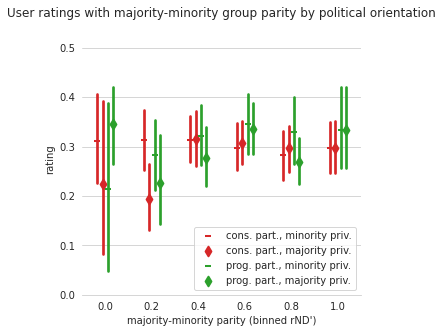

In [20]:
split_at = np.nanmedian(df_ran['user.political'])
print('splited groups at:', split_at)

df_maj = df_ran.copy()
df_maj['rND'] = df['question.cat_rND']
df_maj['type'] = 'cons. part., majority priv.'
df_maj.loc[df['user.political']>split_at, 'type'] = 'prog. part., majority priv.'
df_min = df_ran.copy()
df_min['rND'] = df['question.cat_inverse_rND']
df_min['type'] = 'cons. part., minority priv.'
df_min.loc[df['user.political']>split_at, 'type'] = 'prog. part., minority priv.'

red = sns.color_palette()[3]
green = sns.color_palette()[2]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_maj, df_min]), ax=ax, dodge=.35, ci=90,
                  x='rND', y='rating', hue='type', join=False,
                  palette=[red, red, green, green], markers=['_','d','_','d'],
                  hue_order = ['cons. part., minority priv.', 'cons. part., majority priv.',
                          'prog. part., minority priv.', 'prog. part., majority priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.55))
ax.legend(loc=4)
g.set_title('User ratings with majority-minority group parity by political orientation')
g.set(xlabel = 'majority-minority parity (binned rND\')')
sns.despine(left=True)

Political orientation again seems to have no clear effect.

# Group Parity by Personality Traits

splited groups at: 3.5


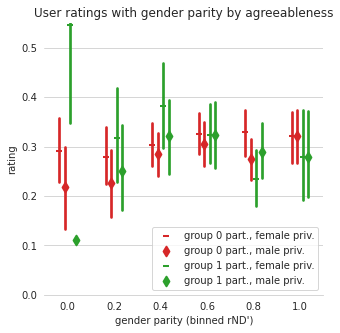

In [21]:
split_at = np.nanmedian(df_ran['user.agreeableness'])
print('splited groups at:', split_at)

df_male = df_ran.copy()
df_male['rND'] = df['question.cat_gender_rND']
df_male['type'] = 'group 0 part., male priv.'
df_male.loc[df['user.agreeableness']>split_at, 'type'] = 'group 1 part., male priv.'
df_female = df_ran.copy()
df_female['rND'] = df['question.cat_inverse_gender_rND']
df_female['type'] = 'group 0 part., female priv.'
df_female.loc[df['user.agreeableness']>split_at, 'type'] = 'group 1 part., female priv.'

red = sns.color_palette()[3]
green = sns.color_palette()[2]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.35, ci=90,
                  x='rND', y='rating', hue='type', join=False,
                  palette=[red, red, green, green], markers=['_','d','_','d'],
                  hue_order = ['group 0 part., female priv.', 'group 0 part., male priv.',
                          'group 1 part., female priv.', 'group 1 part., male priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.55))
ax.legend(loc=4)
g.set_title('User ratings with gender parity by agreeableness')
g.set(xlabel = 'gender parity (binned rND\')')
sns.despine(left=True)

splited groups at: 3.5


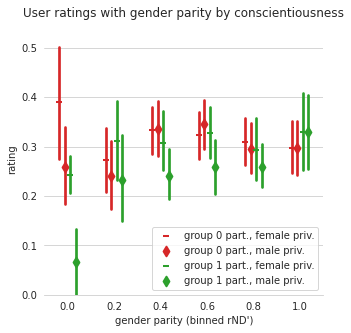

In [22]:
split_at = np.nanmedian(df_ran['user.conscientiousness'])
print('splited groups at:', split_at)

df_male = df_ran.copy()
df_male['rND'] = df['question.cat_gender_rND']
df_male['type'] = 'group 0 part., male priv.'
df_male.loc[df['user.conscientiousness']>split_at, 'type'] = 'group 1 part., male priv.'
df_female = df_ran.copy()
df_female['rND'] = df['question.cat_inverse_gender_rND']
df_female['type'] = 'group 0 part., female priv.'
df_female.loc[df['user.conscientiousness']>split_at, 'type'] = 'group 1 part., female priv.'

red = sns.color_palette()[3]
green = sns.color_palette()[2]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.35, ci=90,
                  x='rND', y='rating', hue='type', join=False,
                  palette=[red, red, green, green], markers=['_','d','_','d'],
                  hue_order = ['group 0 part., female priv.', 'group 0 part., male priv.',
                          'group 1 part., female priv.', 'group 1 part., male priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.55))
ax.legend(loc=4)
g.set_title('User ratings with gender parity by conscientiousness')
g.set(xlabel = 'gender parity (binned rND\')')
sns.despine(left=True)

People with higher conscientiousness make a stronger difference between the priviledged gender (unlike in selections).

splited groups at: 3.5


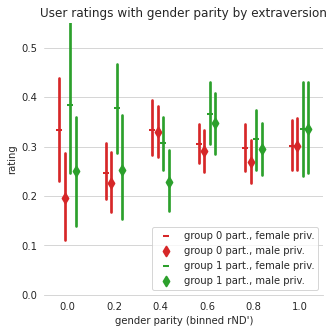

In [23]:
split_at = np.nanmedian(df_ran['user.extraversion'])
print('splited groups at:', split_at)

df_male = df_ran.copy()
df_male['rND'] = df['question.cat_gender_rND']
df_male['type'] = 'group 0 part., male priv.'
df_male.loc[df['user.extraversion']>split_at, 'type'] = 'group 1 part., male priv.'
df_female = df_ran.copy()
df_female['rND'] = df['question.cat_inverse_gender_rND']
df_female['type'] = 'group 0 part., female priv.'
df_female.loc[df['user.extraversion']>split_at, 'type'] = 'group 1 part., female priv.'

red = sns.color_palette()[3]
green = sns.color_palette()[2]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.35, ci=90,
                  x='rND', y='rating', hue='type', join=False,
                  palette=[red, red, green, green], markers=['_','d','_','d'],
                  hue_order = ['group 0 part., female priv.', 'group 0 part., male priv.',
                          'group 1 part., female priv.', 'group 1 part., male priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.55))
ax.legend(loc=4)
g.set_title('User ratings with gender parity by extraversion')
g.set(xlabel = 'gender parity (binned rND\')')
sns.despine(left=True)

People with higher extraversion make a stronger difference between the priviledged gender (unlike in selections).

splited groups at: 3.0


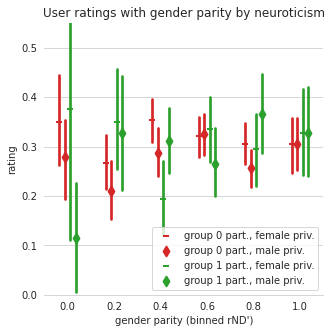

In [24]:
split_at = np.nanmedian(df_ran['user.neuroticism'])
print('splited groups at:', split_at)

df_male = df_ran.copy()
df_male['rND'] = df['question.cat_gender_rND']
df_male['type'] = 'group 0 part., male priv.'
df_male.loc[df['user.neuroticism']>split_at, 'type'] = 'group 1 part., male priv.'
df_female = df_ran.copy()
df_female['rND'] = df['question.cat_inverse_gender_rND']
df_female['type'] = 'group 0 part., female priv.'
df_female.loc[df['user.neuroticism']>split_at, 'type'] = 'group 1 part., female priv.'

red = sns.color_palette()[3]
green = sns.color_palette()[2]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.35, ci=90,
                  x='rND', y='rating', hue='type', join=False,
                  palette=[red, red, green, green], markers=['_','d','_','d'],
                  hue_order = ['group 0 part., female priv.', 'group 0 part., male priv.',
                          'group 1 part., female priv.', 'group 1 part., male priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.55))
ax.legend(loc=4)
g.set_title('User ratings with gender parity by neuroticism')
g.set(xlabel = 'gender parity (binned rND\')')
sns.despine(left=True)

splited groups at: 3.5


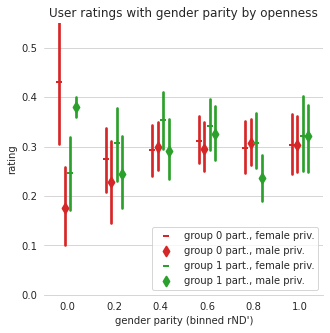

In [25]:
split_at = np.nanmedian(df_ran['user.openness'])
print('splited groups at:', split_at)

df_male = df_ran.copy()
df_male['rND'] = df['question.cat_gender_rND']
df_male['type'] = 'group 0 part., male priv.'
df_male.loc[df['user.openness']>split_at, 'type'] = 'group 1 part., male priv.'
df_female = df_ran.copy()
df_female['rND'] = df['question.cat_inverse_gender_rND']
df_female['type'] = 'group 0 part., female priv.'
df_female.loc[df['user.openness']>split_at, 'type'] = 'group 1 part., female priv.'

red = sns.color_palette()[3]
green = sns.color_palette()[2]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.35, ci=90,
                  x='rND', y='rating', hue='type', join=False,
                  palette=[red, red, green, green], markers=['_','d','_','d'],
                  hue_order = ['group 0 part., female priv.', 'group 0 part., male priv.',
                          'group 1 part., female priv.', 'group 1 part., male priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.55))
ax.legend(loc=4)
g.set_title('User ratings with gender parity by openness')
g.set(xlabel = 'gender parity (binned rND\')')
sns.despine(left=True)

The other personality traits seem to have no visible impact (same is in selections)